<a href="https://colab.research.google.com/github/habiclaude88/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks")
!ls

 cloneproject.ipynb			   NLP
'Copy of dataprcessing_ProjectKRY.ipynb'   nlp_training_ff_giz
'Copy of FSE_COLAB_INSTALL.ipynb'	   quotes2.txt
'Copy of textgenerator.ipynb'		   quotes.txt
 dataprcessing_ProjectKRY.ipynb		   Recommendation
 Fraud					   Test.ipynb
 IMDB					   text_generationGRU.ipynb
 IWD.ipynb				   textgenerator.ipynb
'KAMITI Messages.xlsx'			   training
'language model.ipynb'			   Untitled0.ipynb
 masakhane				   Untitled1.ipynb
 news.ipynb				   Untitled2.ipynb


In [ ]:
#Load libraries
import pandas as pd

In [ ]:
import os
os.chdir("")
#!unzip amazon_baby.zip

In [ ]:
!ls

amazon_baby.csv  Bible.txt		COVID-19_English.pdf  logistic.pkl
amazon_baby.zip  countvector.pkl	igihearticle.csv      rbc_tweets.csv
bbc.csv		 COVID-19_English.docx	igihelinks.csv	      Test_Json.json


In [ ]:
#Get data
def extractData(filepath,fileformat):
  if fileformat == 'csv':
    data = pd.read_csv(filepath)
  elif fileformat == 'excel':
    data = pd.read_excel(filepath)

  return data

In [ ]:
df_amazon = extractData("amazon_baby.csv","csv")

In [ ]:
df_amazon.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [ ]:
len(df_amazon[df_amazon['rating'] == 5])

107054

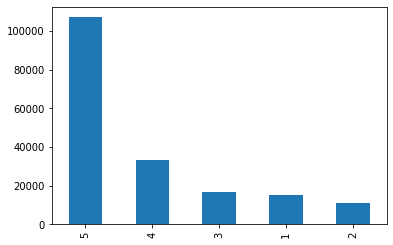

In [ ]:
df_amazon['rating'].value_counts().plot.bar()

In [ ]:
#Preprocessing
# 1. Get subset of 10,000 rows
#df_amazon_resized = df_amazon[:10000]
dataset_positive = df_amazon[df_amazon['rating'] >= 4][:10000]
dataset_negative = df_amazon[df_amazon['rating'] < 4][:10000]
df_amazon_resized = pd.concat([dataset_positive, dataset_negative])


In [ ]:
df_amazon_resized.head()

,name,review,rating
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5


In [ ]:
import re
def preprocessing(text):
  text = text.lower()
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  html_pattern = re.compile('<.*?>')
  text = emoji_pattern.sub(r'', text)
  text = url_pattern.sub(r'', text)
  text = html_pattern.sub(r'', text)
  text = re.sub(r"[^\w\d'\s]+", '', text)

  return text
  

In [ ]:
sentence = []
ratings = []
for index, row in df_amazon_resized.iterrows():
  if type(row['review']) == str:
    sentence.append(preprocessing(row['review']))
    ratings.append(row['rating'])
preprocessed_df = pd.DataFrame(columns=['sentence','ratings'])
preprocessed_df['sentence'] = sentence
preprocessed_df['ratings'] = ratings

In [ ]:
preprocessed_df.head()

,sentence,ratings
0,it came early and was not disappointed i love ...,5
1,very soft and comfortable and warmer than it l...,5
2,this is a product well worth the purchase i h...,5
3,all of my kids have cried nonstop when i tried...,5
4,when the binky fairy came to our house we didn...,5


In [ ]:
def sentiment(n):
  return 1 if n >=4 else 0

In [ ]:
preprocessed_df['sentiment'] = preprocessed_df['ratings'].apply(sentiment)

In [ ]:
preprocessed_df.head()

,sentence,ratings,sentiment
0,it came early and was not disappointed i love ...,5,1
1,very soft and comfortable and warmer than it l...,5,1
2,this is a product well worth the purchase i h...,5,1
3,all of my kids have cried nonstop when i tried...,5,1
4,when the binky fairy came to our house we didn...,5,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
X, y = preprocessed_df['sentence'].astype('str'), preprocessed_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
import joblib
cv = CountVectorizer()
X_train_vec = cv.fit_transform(X_train)
joblib.dump(cv,'countvector.pkl')
X_test_vec= cv.transform(X_test)

In [ ]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(max_iter=1000)
clf.fit(X_train_vec,y_train)
pred = clf.predict(X_test_vec)

print("accuracy: ", sum(pred==y_test)*1.0/len(y_test))

accuracy:  0.845028067361668


In [ ]:
joblib.dump(clf,'logistic.pkl')

['logistic.pkl']

In [ ]:
val = df_amazon.iloc[18900]
#val['rating']
val['review']

"First off, the video and audio quality were exactly what we were after. No interference and great range around the house and yard. As others have mentioned, there are only 2 channels, and the signal is not secure. Our neighbors have the same monitor and they can see our baby and we can see their baby - luckily we're good friends with them so we're not too worried about this, but this may be a concern for others.The reason why I'm not giving this more stars is the durability of the hand held unit. The battery life was almost non-existent after a year, which I can understand after repeated discharges and re-charges, this forces us to always use the plug and limits mobility for us at times, but this is not a major concern. If replacements were more readily available I would have purchased one.The other problem is with the volume control. We have never dropped the hand held or abused it, but after a little less than 18 months began having problems with the volume control. First it would o

In [ ]:
df_amazon[2000:3000]

In [ ]:
new_text = preprocessing(val['review'])
new_text
new_text_vec = cv.transform([new_text])
pred = clf.predict(new_text_vec)
pred

array([0])